In [12]:
##导入库
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

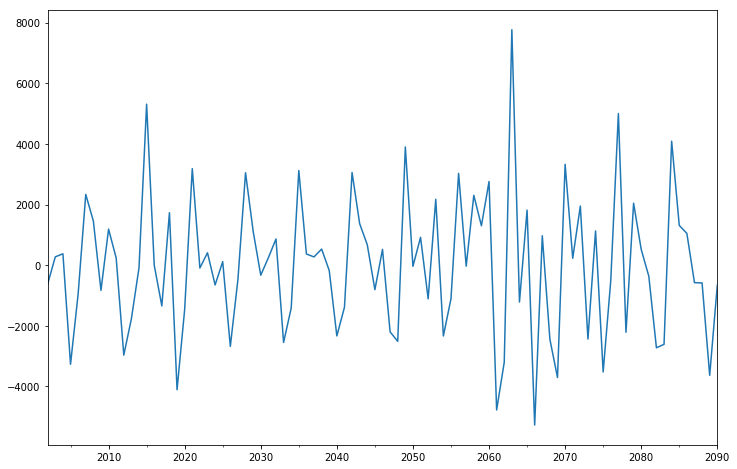

In [13]:
##导入数据
dta=[-612,
277,
377,
-3266,
-950,
2336,
1459,
-829,
1191,
238,
-2965,
-1764,
-85,
5312,
3,
-1342,
1733,
-4106,
-1461,
3186,
-92,
411,
-650,
118,
-2676,
-469,
3051,
1122,
-329,
247,
866,
-2548,
-1414,
3125,
371,
274,
533,
-175,
-2332,
-1388,
3060,
1369,
676,
-806,
522,
-2199,
-2511,
3901,
-36,
920,
-1108,
2175,
-2333,
-1105,
3029,
-31,
2305,
1302,
2761,
-4775,
-3201,
7769,
-1214,
1817,
-5271,
971,
-2446,
-3705,
3329,
229,
1952,
-2434,
1130,
-3521,
-503,
5004,
-2211,
2046,
521,
-363,
-2723,
-2609,
4091,
1314,
1050,
-574,
-585,
-3632,
-659,
]

dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2002','2090'))
dta.plot(figsize=(12,8))
plt.show()

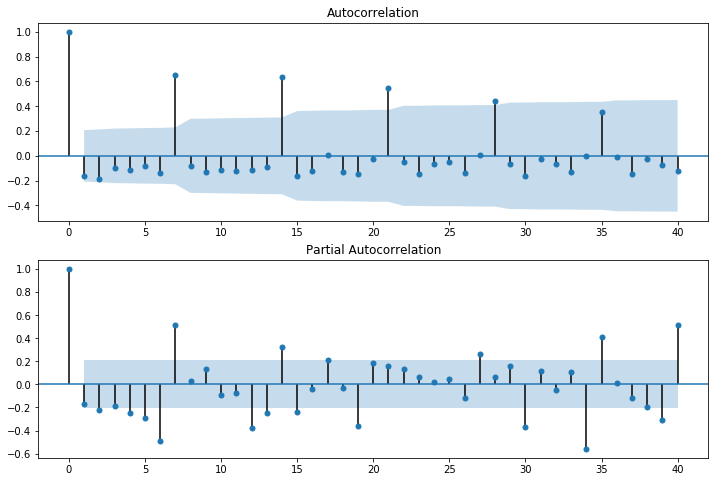

In [14]:
## ACF PACF
# plot acf and pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(dta.values,lags=40,ax=ax1) # lags 表示滞后的阶数
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(dta.values,lags=40,ax=ax2)
plt.show()

In [4]:
# 模型1
arma_mod70 = sm.tsa.ARMA(dta, (7, 0)).fit(disp=False)
print(arma_mod70.aic, arma_mod70.bic, arma_mod70.hqic)
# 模型2
arma_mod01 = sm.tsa.ARMA(dta, (0, 1)).fit(disp=False)
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)
# 模型3
arma_mod71 = sm.tsa.ARMA(dta, (7, 1)).fit(disp=False)
print(arma_mod71.aic, arma_mod71.bic, arma_mod71.hqic)
# 模型4
arma_mod80 = sm.tsa.ARMA(dta, (8, 0)).fit(disp=False)
print(arma_mod80.aic, arma_mod80.bic, arma_mod80.hqic)
# 模型5（只是为了示范，p和q随便取的）
arma_mod32 = sm.tsa.ARMA(dta, (3,2 )).fit(disp=False)
print(arma_mod32.aic, arma_mod32.bic, arma_mod32.hqic)
# 最佳模型可以取aic最小的一个

1579.7025549256962 1602.1002822532855 1588.7304360577534
1632.3203732818517 1639.7862823910482 1635.3296669925376
1581.091605723713 1605.9779694210345 1591.1225847593323
1581.3957840559071 1606.2821477532286 1591.4267630915265
1622.2453661582788 1639.6658207464038 1629.2670514832123


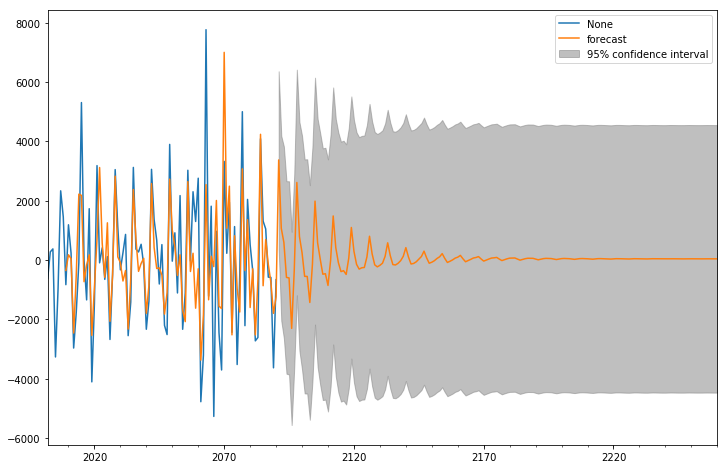

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   89
Model:                     ARMA(7, 0)   Log Likelihood                -780.851
Method:                       css-mle   S.D. of innovations           1524.852
Date:                Wed, 22 Nov 2023   AIC                           1579.703
Time:                        08:06:34   BIC                           1602.100
Sample:                    12-31-2002   HQIC                          1588.730
                         - 12-31-2090                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5753     72.268      0.589      0.557     -99.068     184.219
ar.L1.y       -0.2975      0.093     -3.213      0.002      -0.479      -0.116
ar.L2.y       -0.3757      0.094     -3.976      0.0

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2001':].plot(ax=ax)
fig = arma_mod70.plot_predict('2009', '2260', dynamic=False, ax=ax, plot_insample=False, alpha=0.05)
plt.show()
print(arma_mod70.summary())

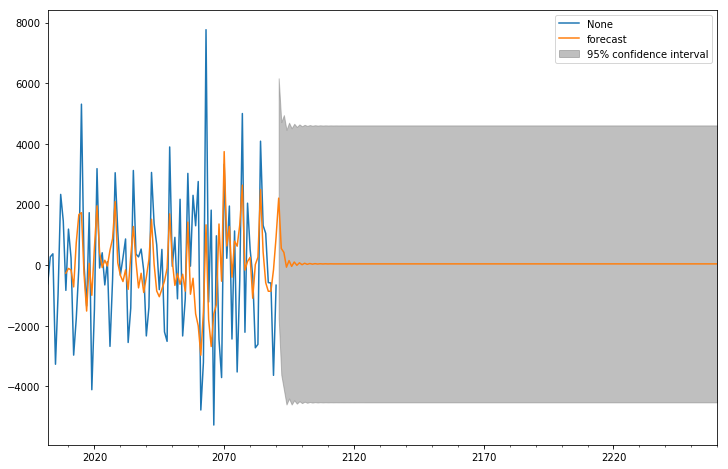

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2001':].plot(ax=ax)
fig = arma_mod32.plot_predict('2009', '2260', dynamic=False, ax=ax, plot_insample=False)
plt.show()

Date
2014-04-01    2.59
2014-04-02    2.60
2014-04-03    2.58
2014-04-04    2.60
2014-04-07    2.60
2014-04-08    2.64
2014-04-09    2.63
2014-04-10    2.67
2014-04-11    2.68
2014-04-14    2.67
2014-04-15    2.62
2014-04-16    2.63
2014-04-17    2.63
2014-04-18    2.63
2014-04-21    2.60
2014-04-22    2.63
2014-04-23    2.61
2014-04-24    2.60
2014-04-25    2.61
2014-04-28    2.62
2014-04-29    2.61
2014-04-30    2.60
2014-05-01    2.60
2014-05-02    2.60
2014-05-05    2.60
2014-05-06    2.59
2014-05-07    2.60
2014-05-08    2.61
2014-05-09    2.61
2014-05-12    2.64
              ... 
2014-05-20    2.65
2014-05-21    2.66
2014-05-22    2.67
2014-05-23    2.68
2014-05-26    2.69
2014-05-27    2.68
2014-05-28    2.69
2014-05-29    2.69
2014-05-30    2.67
2014-06-02    2.67
2014-06-03    2.72
2014-06-04    2.72
2014-06-05    2.73
2014-06-06    2.70
2014-06-09    2.72
2014-06-10    2.74
2014-06-11    2.74
2014-06-12    2.76
2014-06-13    2.80
2014-06-16    2.81
2014-06-17    2.78
2014-06

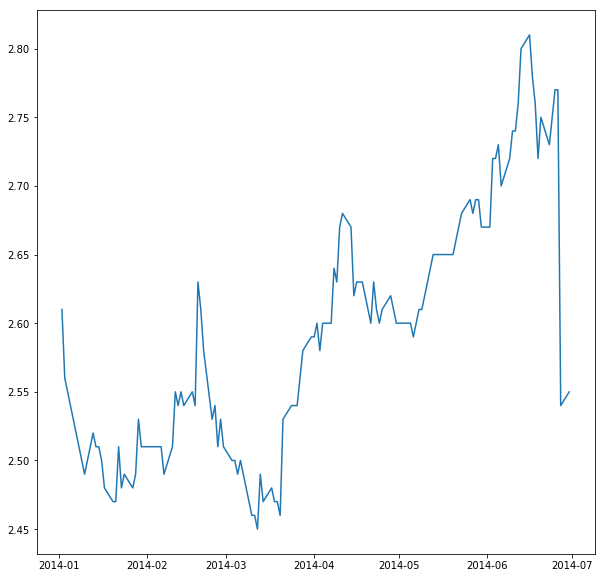

In [8]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
ChinaBank = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date'])

#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = ChinaBank['2014-01':'2014-06']['Close']
train = sub.ix['2014-01':'2014-03']
test = sub.ix['2014-04':'2014-06']
plt.figure(figsize=(10,10))
print(sub.ix['2014-04':'2014-06'])
plt.plot(sub)
plt.show()

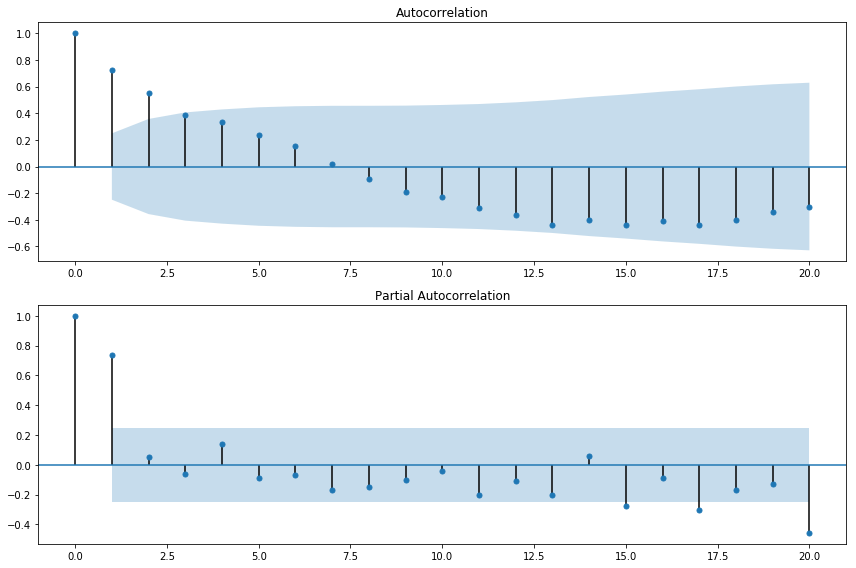

In [9]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

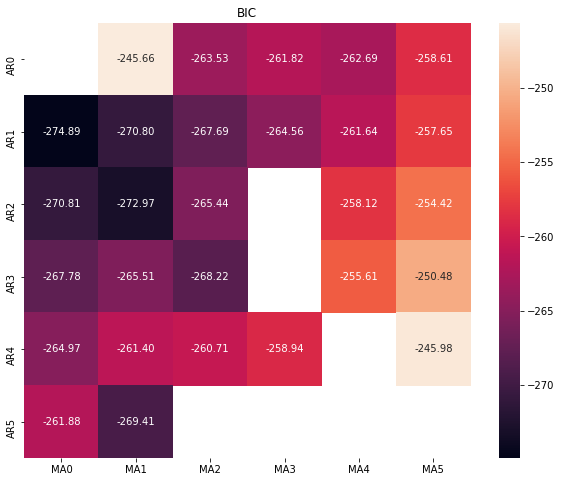

In [10]:
#遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

## model = sm.tsa.ARIMA(sub, order=(1, 0, 0))
results = model.fit()
predict_sunspots = results.predict(start=63,end=107,dynamic=False)
#print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [11]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
print(results.forecast()[0])
print(test[0])

[2.58017324]
2.59
